In [1]:
from tensorflow.keras.datasets.mnist import load_data
# ((訓練圖片, 訓練答案), (測試圖片, 測試答案))
(x_train, y_train), (x_test, y_test) = load_data()

In [2]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [3]:
import pandas as pd
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


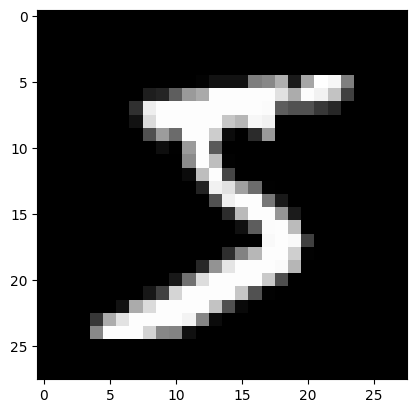

In [4]:
# https://matplotlib.org/stable/tutorials/colors/colormaps.html
# cmap="PiYG" -> "PiYG_r"
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap="gray")

In [5]:
# 基底(Model): Sequential(一定是一層疊一層上面), Model(想怎麼疊都可以)
# 層(Layer) : Dense(全連接層)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# bias: 每一層有多少個輸出, 就有多少個激活函式, 就有多少個bias
layers = [
    # 784 * 128 + 128(bias) = 100480
    Dense(128, activation="relu", input_dim=784),
    # 128 * 10 + 10(bias) = 1290
    Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [6]:
# 輸出一個(二元): ACT->sigmoid loss: binary crossentropy(plog1/q + (1-p)log1/(1-q))
# 輸出多個
# (多元互斥): ACT->softmax loss: categorical crossentropy(p1log1/q1 + p2log1/q2 + ...)
# (多元不互斥): 照二元選
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
model.compile(loss=CategoricalCrossentropy(),
       optimizer=Adam(),
       metrics=["accuracy"])

In [7]:
from tensorflow.keras.utils import to_categorical
# num_classes=10 => y值只能是 0~9 
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)
print(y_train[0])
print(y_train_cat[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [8]:
import numpy as np
test = np.array([
    [1, 2, 3],
    [4, 5, 6]
])
# -1: 某個位置讓他自己推測
test.reshape(3, 2)
test.reshape(3, -1)

array([[1, 2],
       [3, 4],
       [5, 6]])

In [9]:
x_train_norm = x_train.reshape(60000, 784) / 255.0
x_test_norm = x_test.reshape(10000, 784) / 255.0

In [10]:
# batch_size: 看多少筆做一次梯度下降(把所有筆的斜率做一個平均)
# epochs: 整份(60000筆)妳總共看幾次
# validation_split: 切出多少%作為我的測試資料(10%)
# 270調整: (60000 * 0.9) / 200 -> 270 
# loss/accuracy: 54000筆訓練資料
# val_loss/val_accuracy: 6000筆測試資料
# !!! 看val_loss平滑下來->epochs
# !!! 過擬合: 不要無腦訓練下去(train loss會變低), 但你對於沒看過資料表現的並不會比較好(val loss變高)
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = [
    ModelCheckpoint("mlp.h5", save_best_only=True),
    EarlyStopping(patience=5, restore_best_weights=True)
    # val_loss 5次沒進步的話就停
]
# 不想要進度條, verbose=2
model.fit(x_train_norm,
     y_train_cat,
     batch_size=200,
     epochs=50,
     validation_split=0.1,
     callbacks=callbacks)

Epoch 1/50
270/270 [==============================] - 2s 2ms/step - loss: 0.4304 - accuracy: 0.8828 - val_loss: 0.1896 - val_accuracy: 0.9493
Epoch 2/50
270/270 [==============================] - 0s 1ms/step - loss: 0.2019 - accuracy: 0.9424 - val_loss: 0.1402 - val_accuracy: 0.9607
Epoch 3/50
270/270 [==============================] - 0s 1ms/step - loss: 0.1502 - accuracy: 0.9572 - val_loss: 0.1180 - val_accuracy: 0.9672
Epoch 4/50
270/270 [==============================] - 0s 1ms/step - loss: 0.1192 - accuracy: 0.9659 - val_loss: 0.1038 - val_accuracy: 0.9710
Epoch 5/50
270/270 [==============================] - 0s 1ms/step - loss: 0.0982 - accuracy: 0.9718 - val_loss: 0.0926 - val_accuracy: 0.9762
Epoch 6/50
270/270 [==============================] - 0s 1ms/step - loss: 0.0823 - accuracy: 0.9764 - val_loss: 0.0863 - val_accuracy: 0.9742
Epoch 7/50
270/270 [==============================] - 0s 1ms/step - loss: 0.0705 - accuracy: 0.9803 - val_loss: 0.0834 - val_accuracy: 0.9750
Epoch 

In [11]:
# 用沒看過的一萬筆作最終評估
model.evaluate(x_test_norm, y_test_cat)

313/313 [==============================] - 0s 1ms/step - loss: 0.0746 - accuracy: 0.9774


[0.07460958510637283, 0.977400004863739]

In [12]:
x_train_norm = x_train.reshape(60000, 784) / 255.0
x_test_norm = x_test.reshape(10000, 784) / 255.0

In [13]:
 test = np.array([[0.8, 0.2], [0.3, 0.7], [0.1, 0.9]])
# np argmax
# 預設: flatten後 找最大的位置
# axis=0: 直得哪個最大
# axis=1: 橫得哪個最大
 test.argmax(axis=-1)

array([0, 1, 1], dtype=int64)

In [14]:
from sklearn.metrics import confusion_matrix
pre = model.predict(x_test_norm).argmax(axis=-1)
# y注意一下: tensorflow裡:y_train_cat 出了tensorflow:帶原本y_train
mat = confusion_matrix(y_test, pre)
pd.DataFrame(mat, 
      columns=[f"{i}(predict)" for i in range(10)],
      index=[f"{i}(true)" for i in range(10)])

,0(predict),1(predict),2(predict),3(predict),4(predict),5(predict),6(predict),7(predict),8(predict),9(predict)
0(true),970,0,1,2,1,0,2,2,2,0
1(true),0,1126,3,0,0,1,2,0,3,0
2(true),6,2,999,5,1,0,2,6,11,0
3(true),1,0,1,996,0,2,0,5,4,1
4(true),1,0,1,1,965,0,2,3,2,7
5(true),3,0,0,7,1,866,6,3,2,4
6(true),7,3,2,1,2,8,933,1,1,0
7(true),0,4,7,4,1,0,0,1003,2,7
8(true),6,0,1,12,5,3,1,3,939,4
9(true),3,4,0,6,10,2,0,6,1,977


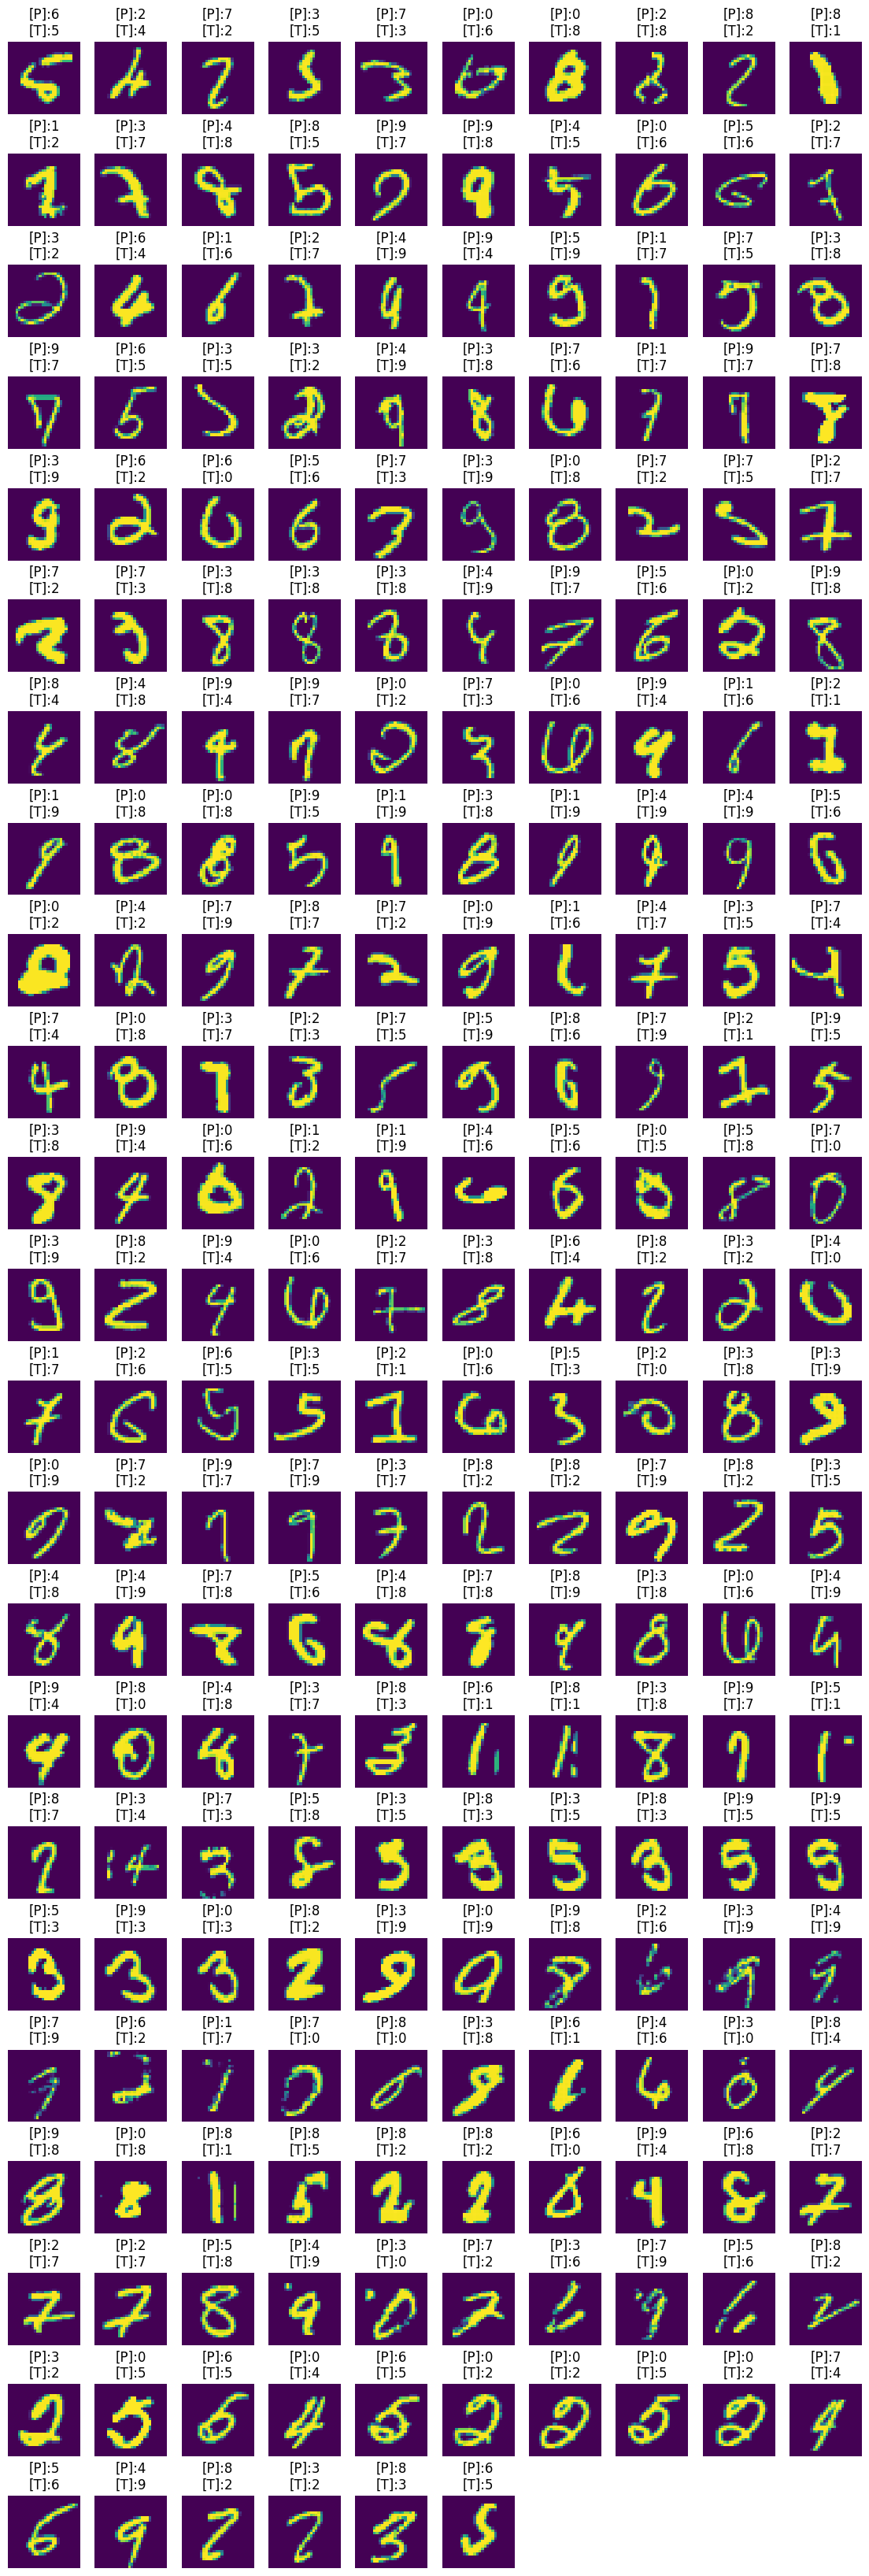

In [15]:
# subplot(總高度,總寬度, ith[1,2,3])
# (2, 3, 1) (2, 3, 2) (2, 3, 3)
# (2, 3, 4) (2, 3, 5) (2, 3, 6)
import matplotlib.pyplot as plt
plt.figure(figsize=(14,42))
idx = np.nonzero(pre!=y_test)[0]

false_pre = pre[idx]
false_true = y_test[idx]
false_img = x_test[idx]

width = 10
height = len(idx) // width + 1

for i in range(len(idx)):
    plt.subplot(height, width, i+1)
    title = "[P]:{}\n[T]:{}".format(false_pre[i], false_true[i])
    plt.title(title)
    plt.axis("off")
    plt.imshow(false_img[i])